In [1]:
import pandas as pd 
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 
import json
import seaborn as sns

mpl.style.use('ggplot')

In [2]:
#read the date
train = pd.read_csv('./data/train.csv',engine ='python', error_bad_lines=False ,parse_dates=['date'],warn_bad_lines =False)


In [3]:
#copy there col
grp_1= train[['fullVisitorId','totals','date']].copy()

In [4]:
#json col load

d_t= pd.io.json.json_normalize(grp_1.totals.apply(json.loads))


In [5]:
#join the total json col in grp_1 df
grp_1=grp_1.join(d_t.apply(pd.Series))

In [6]:
#final dataset target
df=grp_1[['fullVisitorId','transactionRevenue','date']].copy()

In [7]:
#show dataset target
df.head()

,fullVisitorId,transactionRevenue,date
0,1131660440785968503,NaN,2016-09-02
1,377306020877927890,NaN,2016-09-02
2,3895546263509774583,NaN,2016-09-02
3,4763447161404445595,NaN,2016-09-02
4,27294437909732085,NaN,2016-09-02


In [8]:
# rename col  transactionRevenue to revenue.
df.rename(columns={'transactionRevenue':'revenue'},inplace=True)

In [9]:
# rename col  fullVisitorId to ID.
df.rename(columns={'fullVisitorId':'ID'},inplace=True)

In [10]:
df.columns

Index(['ID', 'revenue', 'date'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421729 entries, 0 to 421728
Data columns (total 3 columns):
ID         421729 non-null object
revenue    5383 non-null object
date       421729 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 9.7+ MB


In [12]:
#change datatype revenue to float 
# null values to zero because mean customer doesn't buy.
df['revenue'].fillna(0,inplace=True)
df['revenue']=df['revenue'].astype(float)

In [13]:
# unquien values in fullVisitorId
print('unique for fullid: ',str(len(df['ID'].unique().tolist())))
print('all fullid: ',str(len(df['ID'])))
print('num between all , unique : ',str(len(df['ID'])-len(df['ID'].unique().tolist())))

#fullId reapted 
#let's look duplicated

unique for fullid:  354456
all fullid:  421729
num between all , unique :  67273


In [14]:
#duplicated
df.duplicated().unique().tolist()
# use keep first  true mean find duplicated 

[False, True]

In [15]:
#drop_dauplicate
df.drop_duplicates(inplace=True)

In [16]:
#info after drop duplicate
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391908 entries, 0 to 421728
Data columns (total 3 columns):
ID         391908 non-null object
revenue    391908 non-null float64
date       391908 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.0+ MB


In [17]:
# unquien values in fullVisitorId after drop duplicate
print('unique for fullid: ',str(len(df['ID'].unique().tolist())))
print('all fullid: ',str(len(df['ID'])))
print('num between all , unique : ',str(len(df['ID'])-len(df['ID'].unique().tolist())))


unique for fullid:  354456
all fullid:  391908
num between all , unique :  37452


In [18]:
# df.sort_values(by='ID')

In [19]:
# df.groupby('ID').sum()

In [20]:
#month from date year
df['month']=df['date'].dt.strftime('%m-%d')


In [21]:
df.head()

,ID,revenue,date,month
0,1131660440785968503,0.0,2016-09-02,09-02
1,377306020877927890,0.0,2016-09-02,09-02
2,3895546263509774583,0.0,2016-09-02,09-02
3,4763447161404445595,0.0,2016-09-02,09-02
4,27294437909732085,0.0,2016-09-02,09-02


In [22]:
len(df['month'].unique())

166

In [23]:
#group by ID , Month
df_train =df.groupby(['ID','month']).sum()

In [24]:
df_train.head()

,,revenue
ID,month,
0000010278554503158,10-20,0.0
0000020424342248747,11-30,0.0
000005103959234087,08-21,0.0
0000068403966359845,04-03,0.0
0000093957001069502,09-27,0.0


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 390453 entries, (0000010278554503158, 10-20) to (9999986437109498564, 04-10)
Data columns (total 1 columns):
revenue    390453 non-null float64
dtypes: float64(1)
memory usage: 7.9+ MB


In [26]:
df_train['log_revenue']=np.log(df_train.loc[df_train['revenue']>0,'revenue']-1)
df_train['log_revenue'].unique()


array([        nan, 17.32973893, 17.87509111, ..., 17.45965409,
       18.71573556, 17.29243362])

In [27]:
df_train['log_revenue'].fillna(0,inplace=True)
df_train['log_revenue']=df_train['log_revenue'].astype(float)

In [28]:
df_train.head()

,,revenue,log_revenue
ID,month,,
0000010278554503158,10-20,0.0,0.0
0000020424342248747,11-30,0.0,0.0
000005103959234087,08-21,0.0,0.0
0000068403966359845,04-03,0.0,0.0
0000093957001069502,09-27,0.0,0.0


In [29]:
df_train.reset_index(inplace=True)

In [ ]:
# df_train['ID'].value_counts().plot(kind='bar')

In [31]:
print(df_train['revenue'].max())
print(df_train['revenue'].min())
print(df_train['revenue'].mean())

23129500000.0
0.0
1781226.4728405213


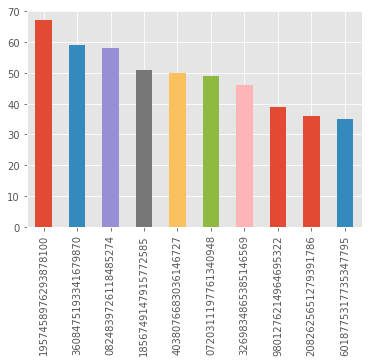

In [35]:
df_train['ID'].value_counts().head(10).plot(kind='bar')


#### Id count_values /.

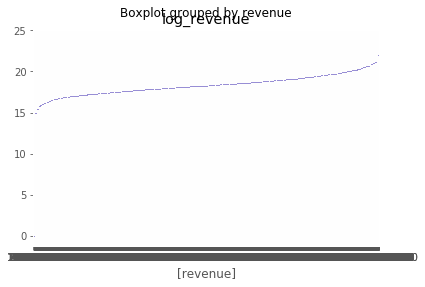

In [36]:
df_train.boxplot(by='revenue')

#### qu what is meaning this plot ?????

Text(0.5,1,'Revenue by Month and ID')

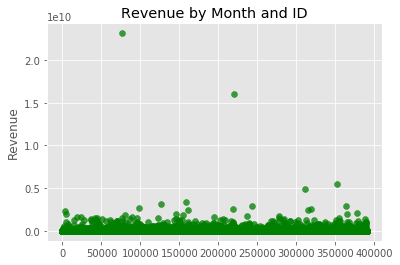

In [38]:
plt.scatter(df_train.index,df_train['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue by Month and ID')

### relation revenue by Id, Months

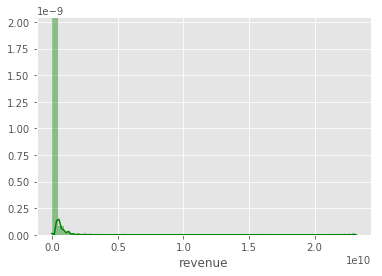

In [43]:
rev=df_train.loc[df_train['revenue']>0,'revenue']
sns.distplot(rev, kde=True,color='green');


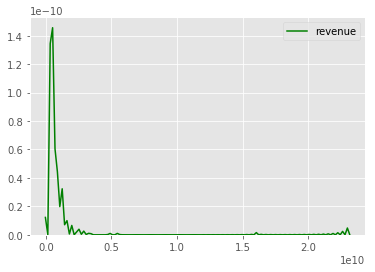

In [45]:
rev=df_train.loc[df_train['revenue']>0,'revenue']
ax=sns.kdeplot(rev,color='green');
ax.xlabel=('Revenue')

Text(0.5,1,'Revenue by Month and ID')

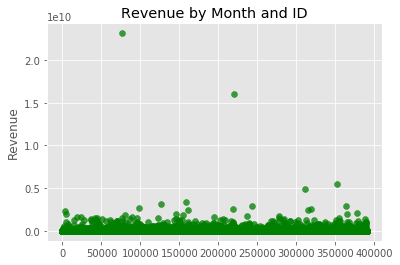

In [48]:
plt.scatter(df_train.index,df_train['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue by Month and ID')

### relation revenue by Id, Months

### All Graph above show revenue from 0- to .5 , have extreme values

Text(0.5,1,'Revenue by Month and ID')

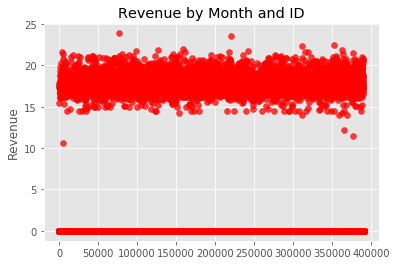

In [46]:
plt.scatter(df_train.index,df_train['log_revenue'], c='r',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue by Month and ID')

### relation log_revenue by Id, Months

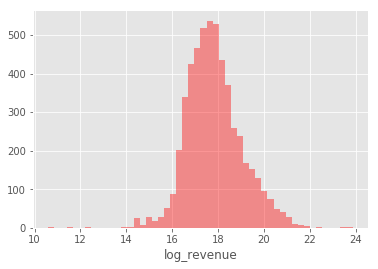

In [54]:
log_r=df_train.loc[df_train['log_revenue']>0,'log_revenue']
sns.distplot(log_r, kde=False,color='r');


#### relation between ID and log_revenue

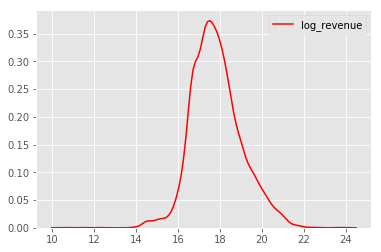

In [53]:
sns.kdeplot(log_r,color='r');


#### relation between Id , log_revenue

### Graph shows sum Revenue for all IDs across months  (-->)

In [55]:
df_values=df_train.loc[df_train['revenue']> 0]

Text(0.5,1,'"Revenue greater than 0" by Month and ID')

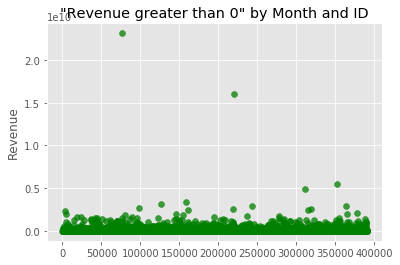

In [56]:
plt.scatter(df_values.index,df_values['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('"Revenue greater than 0" by Month and ID')

### Graph shows sum Revenue " gearter than zero" for all IDs across months 

In [57]:
df_ID =df.groupby(['ID',]).sum()

In [58]:
df_ID.reset_index(inplace=True)

In [59]:
df_month =df.groupby(['month']).sum()

In [60]:
df_month.reset_index(inplace=True)

### Graph shows sum Revenue for all IDs (relationship between ID - sum revenue)


Text(0.5,1,'Revenue daily')

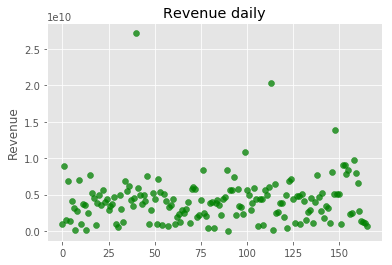

In [62]:
plt.scatter(df_month.index,df_month['revenue'], c='green',alpha = 0.75)
plt.ylabel('Revenue')
plt.title('Revenue daily')
# a = [0.0,.30,.60,.90,.120,.150,.180,.210,.240,.270,.300,.330]
# b = [i+2 for i in a]

# Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
# plt.xticks(b, Month_name)


#### revenue daliy ( (group by month not year))

In [63]:
date=df.groupby(['date']).sum()

In [64]:
#group by  date
date.head()

,revenue
date,
2016-08-03,0.000000e+00
2016-08-05,5.594260e+09
2016-08-09,5.596400e+09
2016-08-11,7.427120e+09
2016-08-13,2.198710e+09


(array([736177., 736238., 736299., 736361., 736420., 736481., 736542.]),
 <a list of 7 Text xticklabel objects>)

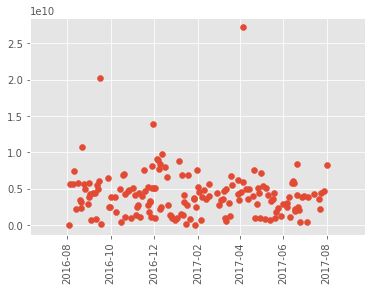

In [65]:
plt.scatter(date.index,date['revenue'])
plt.xticks(rotation = 90)


#### date by months (clear)


In [66]:
ID=df.groupby(['ID']).sum()

In [ ]:
# plt.plot(ID.index,ID['revenue'])


In [67]:
df.describe()

,revenue
count,3.919080e+05
mean,1.774613e+06
std,5.549337e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.312950e+10


#### ----------------

In [68]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [69]:
#json col load
totals= pd.io.json.json_normalize(grp_1.totals.apply(json.loads))
device= pd.io.json.json_normalize(train.device.apply(json.loads))
geoNetwork= pd.io.json.json_normalize(train.geoNetwork.apply(json.loads))
trafficSource= pd.io.json.json_normalize(train.trafficSource.apply(json.loads))


In [ ]:
# totals.head()

In [70]:
train.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

In [71]:
train2=train.copy()


In [72]:
columns=['totals','device','geoNetwork','trafficSource']
train2.drop(columns,axis=1,inplace=True)

In [73]:
#clean df device
col=['browserSize', 'browserVersion',
       'flashVersion', 'language', 'mobileDeviceBranding',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel',
       'mobileInputSelector', 'operatingSystemVersion',
       'screenColors', 'screenResolution']
device.drop(col,axis=1,inplace=True)
#operatingSystem ,browser,deviceCategory,isMobile

In [74]:
#clean df geoNetwork
# geoNetwork=[['city','continent','country','ubContinent']].copy()
# geoNetwork.columns
col_drop=['city','latitude', 'longitude',
       'metro', 'networkDomain', 'networkLocation', 'region']
geoNetwork.drop(col_drop,axis=1,inplace=True)


In [75]:
totals.head()

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1,1,1,1,NaN,1
1,1,1,1,1,NaN,1
2,1,1,1,1,NaN,1
3,1,1,1,1,NaN,1
4,1,1,NaN,1,NaN,1


In [76]:
trafficSource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421729 entries, 0 to 421728
Data columns (total 14 columns):
adContent                              4893 non-null object
adwordsClickInfo.adNetworkType         9869 non-null object
adwordsClickInfo.criteriaParameters    421729 non-null object
adwordsClickInfo.gclId                 9949 non-null object
adwordsClickInfo.isVideoAd             9869 non-null object
adwordsClickInfo.page                  9869 non-null object
adwordsClickInfo.slot                  9869 non-null object
campaign                               421729 non-null object
campaignCode                           1 non-null object
isTrueDirect                           126234 non-null object
keyword                                182747 non-null object
medium                                 421729 non-null object
referralPath                           160627 non-null object
source                                 421729 non-null object
dtypes: object(14)
memory usage: 45.0+

In [77]:
#join the total json col in grp_1 df
train2=train2.join(totals.apply(pd.Series))
train2=train2.join(device.apply(pd.Series))
train2=train2.join(geoNetwork.apply(pd.Series))
# train2=train2.join(trafficSource.apply(pd.Series))

In [78]:
train2.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,hits,...,transactionRevenue,visits,browser,deviceCategory,isMobile,operatingSystem,cityId,continent,country,subContinent
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,...,NaN,1,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,Western Asia
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,...,NaN,1,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,Australasia
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,...,NaN,1,Chrome,desktop,False,Windows,not available in demo dataset,Europe,Spain,Southern Europe
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,...,NaN,1,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,Southeast Asia
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,...,NaN,1,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,Northern Europe


In [79]:
train2.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue',
       'visits', 'browser', 'deviceCategory', 'isMobile', 'operatingSystem',
       'cityId', 'continent', 'country', 'subContinent'],
      dtype='object')

In [80]:
#del col 
del train2['cityId']

### cealn data final train2

In [81]:
train2['visitStartTime']= pd.to_datetime(train2['visitStartTime'],unit='s')

In [82]:
# rename col.
train2.rename(columns={'transactionRevenue':'revenue'},inplace=True)
train2.rename(columns={'fullVisitorId':'c_id'},inplace=True)



In [83]:
#change datatype revenue to float 
# null values to zero because mean customer doesn't buy.
train2['revenue'].fillna(0,inplace=True)
train2['revenue']=train2['revenue'].astype(float)

In [84]:
#change datatype  to string 

train2['visitId']=train2['visitId'].astype(str)
train2['visitNumber']=train2['visitNumber'].astype(str)
train2['visitNumber']=train2['visitNumber'].astype(str)


In [85]:
#duplicated
train2.duplicated().unique().tolist()
# use keep first  true mean find duplicated 

[False]

In [86]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421729 entries, 0 to 421728
Data columns (total 21 columns):
channelGrouping         421729 non-null object
date                    421729 non-null datetime64[ns]
c_id                    421729 non-null object
sessionId               421729 non-null object
socialEngagementType    421729 non-null object
visitId                 421729 non-null object
visitNumber             421729 non-null object
visitStartTime          421729 non-null datetime64[ns]
bounces                 209114 non-null object
hits                    421729 non-null object
newVisits               328543 non-null object
pageviews               421687 non-null object
revenue                 421729 non-null float64
visits                  421729 non-null object
browser                 421729 non-null object
deviceCategory          421729 non-null object
isMobile                421729 non-null bool
operatingSystem         421729 non-null object
continent               4217

In [87]:
train2.head()

,channelGrouping,date,c_id,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,bounces,hits,...,pageviews,revenue,visits,browser,deviceCategory,isMobile,operatingSystem,continent,country,subContinent
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,2016-09-02 15:33:05,1,1,...,1,0.0,1,Chrome,desktop,False,Windows,Asia,Turkey,Western Asia
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,2016-09-03 05:22:27,1,1,...,1,0.0,1,Firefox,desktop,False,Macintosh,Oceania,Australia,Australasia
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,2016-09-03 01:16:26,1,1,...,1,0.0,1,Chrome,desktop,False,Windows,Europe,Spain,Southern Europe
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,2016-09-03 05:40:13,1,1,...,1,0.0,1,UC Browser,desktop,False,Linux,Asia,Indonesia,Southeast Asia
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,2016-09-02 13:23:20,1,1,...,1,0.0,1,Chrome,mobile,True,Android,Europe,United Kingdom,Northern Europe


In [88]:
# train2['socialEngagementType'].unique()

In [89]:
#describe the object feature
train2.describe(include='object')

,channelGrouping,c_id,sessionId,socialEngagementType,visitId,visitNumber,bounces,hits,newVisits,pageviews,visits,browser,deviceCategory,operatingSystem,continent,country,subContinent
count,421729,421729,421729,421729,421729,421729,209114,421729,328543,421687,421729,421729,421729,421729,421729,421729,421729
unique,8,354456,421574,1,413727,334,1,219,1,167,1,47,3,17,6,211,23
top,Organic Search,1957458976293878100,1332805663854166455_1480060651,Not Socially Engaged,1493146175,1,1,1,1,1,1,Chrome,desktop,Windows,Americas,United States,Northern America
freq,173416,130,2,421729,8,328543,209114,207331,328543,209958,421729,288480,314662,164271,209034,168158,180253


In [90]:
train2.describe()

,revenue
count,4.217290e+05
mean,1.649544e+06
std,5.349755e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.312950e+10


#### qu
##### How to show the number (intger)???


Text(0,0.5,'Values ')

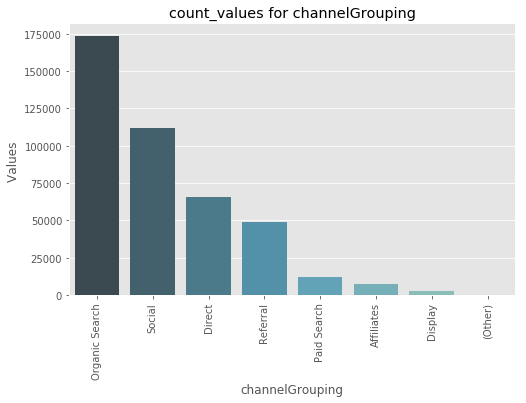

In [91]:
channel_count=train2['channelGrouping'].value_counts()
x=channel_count.index
y=channel_count.values

fig=plt.figure(figsize=(8,5))
ax=sns.barplot(x,y,palette="GnBu_d",saturation=.7, ecolor='orange',capsize=1)
plt.xticks(rotation=90)
plt.title('count_values for channelGrouping')
plt.xlabel('channelGrouping')
plt.ylabel('Values ')


#### Oganinc search have a max values  